# Справочник класса WOE
## Создание экземпляра класса

In [1]:
import pandas as pd
from vtb_scorekit.data import DataSamples
from vtb_scorekit.woe import WOE

ds = DataSamples(samples={'train': pd.read_csv('data/train_titanic.csv')}, target='Survived', result_folder='titanic_output', samples_split={}, bootstrap_split={})

binning = WOE(ds,                                # ДатаСэмпл, для которого будут рассчитываться биннинги
              features=None,                     # список переменных. При None берется ds.features
              scorecard=None,                    # путь к эксель файлу или датафрейм с готовыми биннингами для импорта
              round_digits=3,                    # округление границ бинов до этого числа знаков после запятой.
                                                 # При округлении происходит проверка на долю мигрирующих наблюдений. Если округление приедет к миграции большой доли наблюдений,
                                                 # то round_digits увеличивается до тех пор, пока доля не упадет ниже rounding_migration_coef
              rounding_migration_coef=0.005,     # максимально допустимая доля наблюдений для миграции между бинами при округлении
              # ---Параметры для расчета WOE---
              simple=True,                       # если True, то расчет WOE происходит на трэйн сэмпле, иначе берется среднее значение по фолдам
              n_folds=5,                         # кол-во фолдов для расчета WOE при simple=False
              woe_adjust=0.5,                    # корректировочный параметр для расчета EventRate_i в бине i                                                
              alpha=0,                           # коэффициент регуляризации для расчета WOE
              alpha_range=None,                  # если alpha=None, то подбирается оптимальное значение alpha из диапазона alpha_range. При None берется диапазон range(10, 100, 10)
              alpha_scoring='neg_log_loss',      # метрика, используемая для оптимизации alpha
              alpha_best_criterion='min',        # 'min' - минимизация метрики alpha_scoring, 'max' - максимизация метрики
              missing_process='max_or_separate', # способ обработки пустых значений:
                                                 #     'separate' - помещать в отдельный бин
                                                 #     'min' - объединять с бином с минимальным WOE
                                                 #     'max' - объединять с бином с максимальным WOE
                                                 #     'nearest' - объединять с ближайшим по WOE биномом
                                                 #     'min_or_separate' - если доля пустых значений меньше missing_min_part, то объединять с бином с минимальным WOE, иначе помещать в отдельный бин
                                                 #     'max_or_separate' - если доля пустых значений меньше missing_min_part, то объединять с бином с максимальным WOE, иначе помещать в отдельный бин
                                                 #     'nearest_or_separate' - если доля пустых значений меньше missing_min_part, то объединять с ближайшим по WOE бином, иначе помещать в отдельный бин
              missing_min_part=0.01,             # минимальная доля пустых значений для выделения отдельного бина при missing_process 'min_or_separate', 'max_or_separate' или 'nearest_or_separate'
              others='missing_or_max',           # Способ обработки значений, не попавших в биннинг:
                                                 #     'min': остальным значениям присваивается минимальный WOE
                                                 #     'max': остальным значениям присваивается максимальный WOE
                                                 #     'missing_or_min': если есть бакет с пустыми значениями, то остальным значениям присваивается его WOE, иначе минимальный WOE
                                                 #     'missing_or_max': если есть бакет с пустыми значениями, то остальным значениям присваивается его WOE, иначе максимальный WOE
                                                 #     float: отсутствующим значениям присваивается заданный фиксированный WOE
              opposite_sign_to_others=False,      # В случае, когда непрерывная переменная на выборке для разработки имеет только один знак,
                                                 # то все значения с противоположным знаком относить к others
             )

[INFO] [2023-06-20 14:08:28] ---------------------------------------------------------------- Creating DataSamples ----------------------------------------------------------------
[INFO] [2023-06-20 14:08:28] Selected 8 features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
[INFO] [2023-06-20 14:08:28] Selected 5 categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
[INFO] [2023-06-20 14:08:29] 100 bootstrap samples with 891 observation each and 0.3838 mean target rate were created
[INFO] [2023-06-20 14:08:29] Actual parts of samples after samples split:
      train   Test
part  0.699  0.301
[INFO] [2023-06-20 14:08:29] DataSamples stats:
             train   Test Bootstrap base
amount         623    268            891
target         239    103            342
target_rate  0.384  0.384          0.384
period          NA     NA             NA


## 1. Переменные

In [2]:
# биннинги для каждой переменной
binning.feature_woes 

{'PassengerId': <vtb_scorekit.woe.base.FeatureWOE at 0x7f3e6283f510>,
 'Pclass': <vtb_scorekit.woe.base.FeatureWOE at 0x7f3cb9683890>,
 'Sex': <vtb_scorekit.woe.base.FeatureWOE at 0x7f3cb97f6e50>,
 'Age': <vtb_scorekit.woe.base.FeatureWOE at 0x7f3cb98eb9d0>,
 'SibSp': <vtb_scorekit.woe.base.FeatureWOE at 0x7f3cb985db10>,
 'Parch': <vtb_scorekit.woe.base.FeatureWOE at 0x7f3cb985df10>,
 'Fare': <vtb_scorekit.woe.base.FeatureWOE at 0x7f3cb985d8d0>,
 'Embarked': <vtb_scorekit.woe.base.FeatureWOE at 0x7f3cb9865fd0>}

In [3]:
# список параметров для расчета WOE
binning.round_digits
binning.round_woe
binning.rounding_migration_coef
binning.simple
binning.n_folds
binning.woe_adjust
binning.alpha
binning.alpha_range 
binning.alpha_scoring
binning.alpha_best_criterion
binning.missing_process
binning.missing_min_part
binning.others
binning.opposite_sign_to_others

False

In [4]:
# вспомогательный ДатаСэмпл, содержащий поле со срезами
binning.ds_aux 

In [5]:
# биннинги для кросс-переменных
binning.feature_crosses 

{}

In [6]:
# сет из доступных кросс-переменных
binning.cross_features

set()

## 2. Методы

In [7]:
"""
Создание объекта класса FeatureWOE
:param ds: ДатаСэмпл для обработки
:param f: переменная

:return: FeatureWOE
"""
binning.create_feature_woe(ds, f='Age')         

[INFO] [2023-06-20 14:08:29] Current binning for PassengerId:
 group         values    woe   n  n1
     0   [-inf, 43.0] -0.231  32  14
     1   [43.0, 90.0] -0.530  35  18
     2  [90.0, 138.0]  0.473  33   9
     3 [138.0, 183.0]  0.825  34   7
     4 [183.0, 255.5]  0.178  53  18
     5 [255.5, 349.5] -0.610  58  31
     6 [349.5, 426.0]  0.413  59  17
     7 [426.0, 782.5] -0.122 240  99
     8   [782.5, inf]  0.228  79  26
[INFO] [2023-06-20 14:08:29] Current binning for Pclass:
 group values    woe   n  n1
     0    [1] -0.968 156  97
     1    [2] -0.444 130  64
     2    [3]  0.721 337  78
[INFO] [2023-06-20 14:08:29] Current binning for Sex:
 group     values    woe   n  n1
     0 ['female'] -1.513 219 162
     1   ['male']  0.967 404  77
[INFO] [2023-06-20 14:08:29] Current binning for Age:
 group        values    woe   n  n1
    -1           nan  0.483 127  35
     0  [-inf, 13.5] -0.756  49  28
     1  [13.5, 17.5] -0.353  32  15
     2  [17.5, 21.5]  0.328  62  19
     3 [

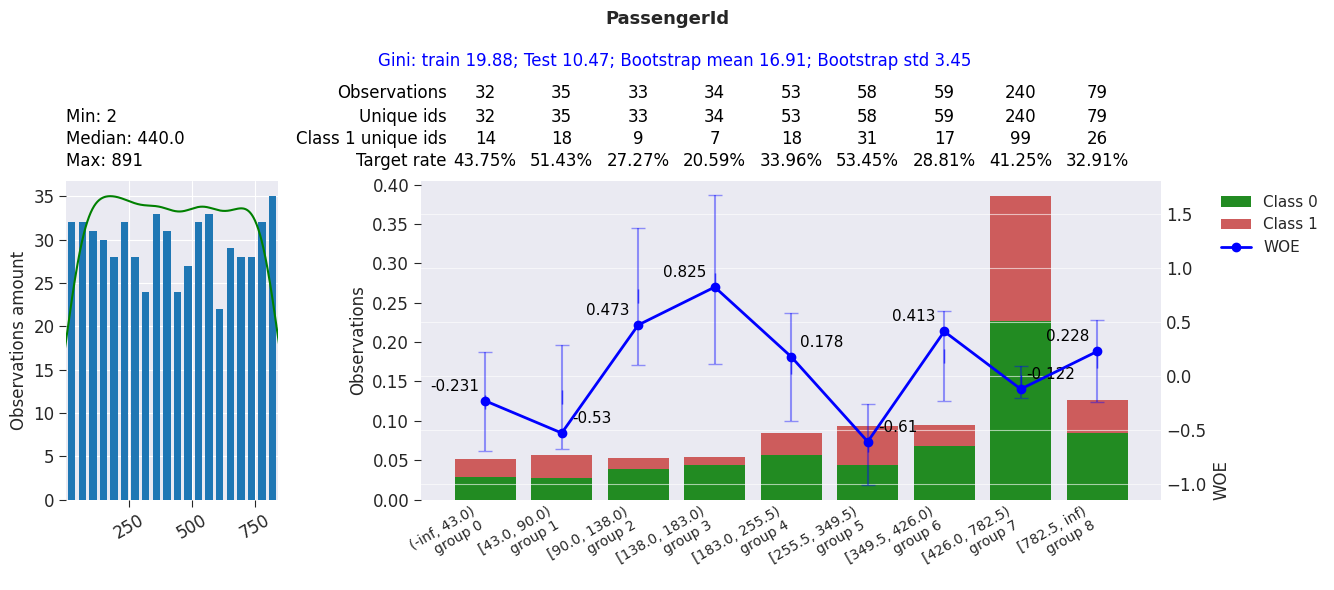

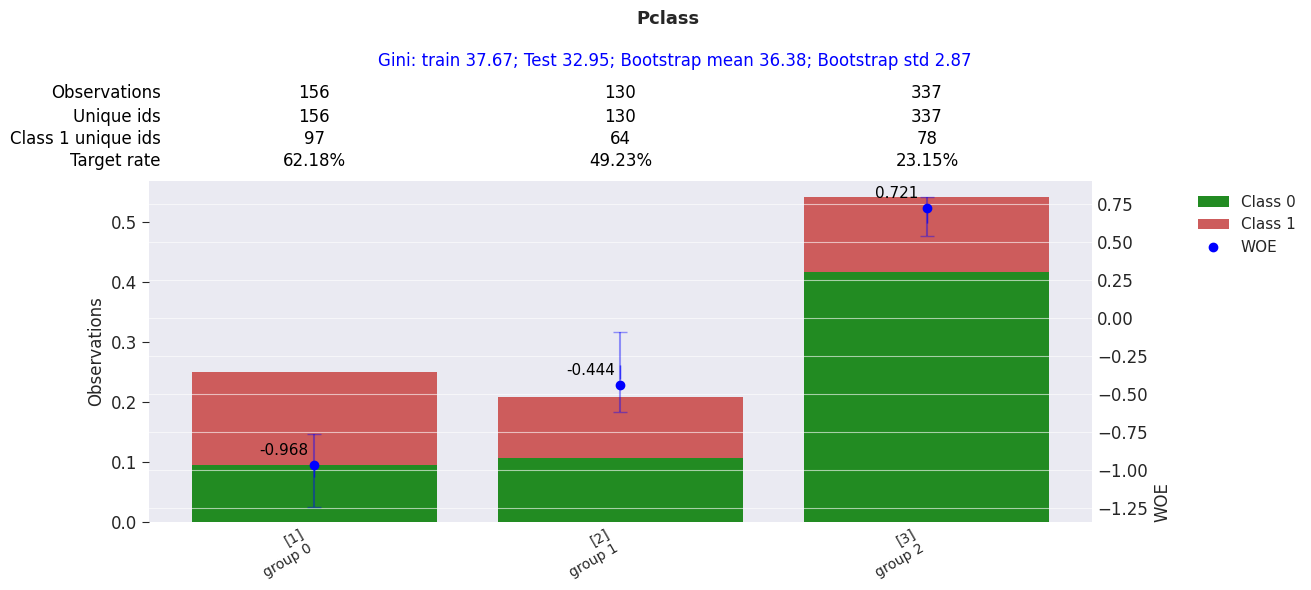

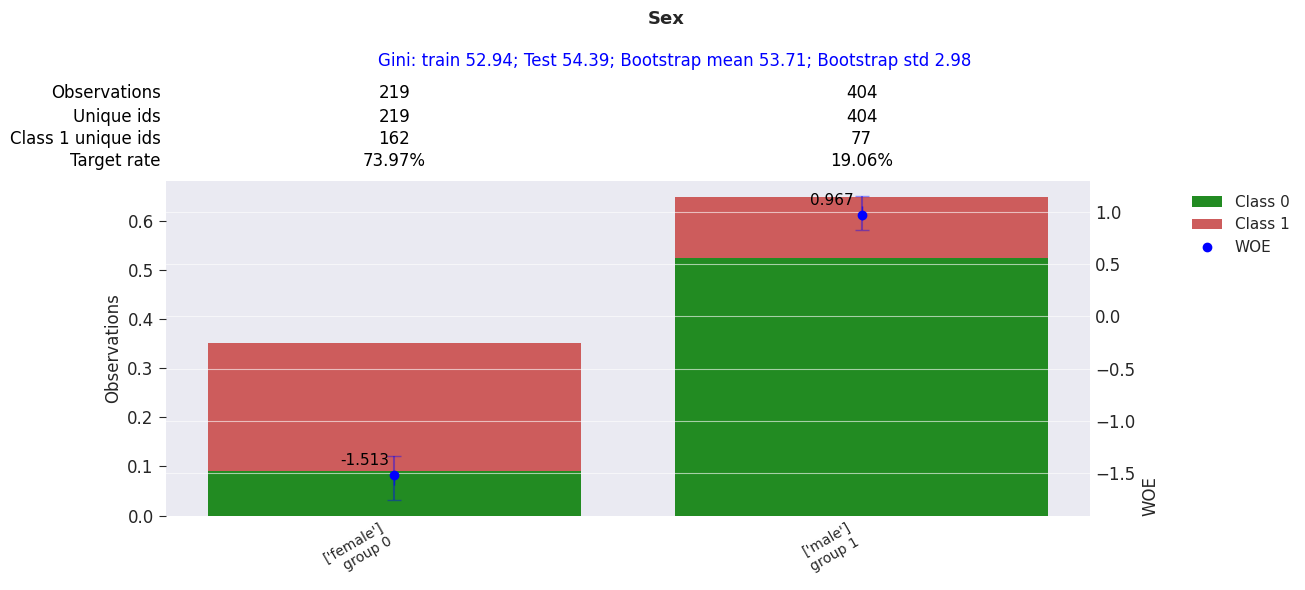

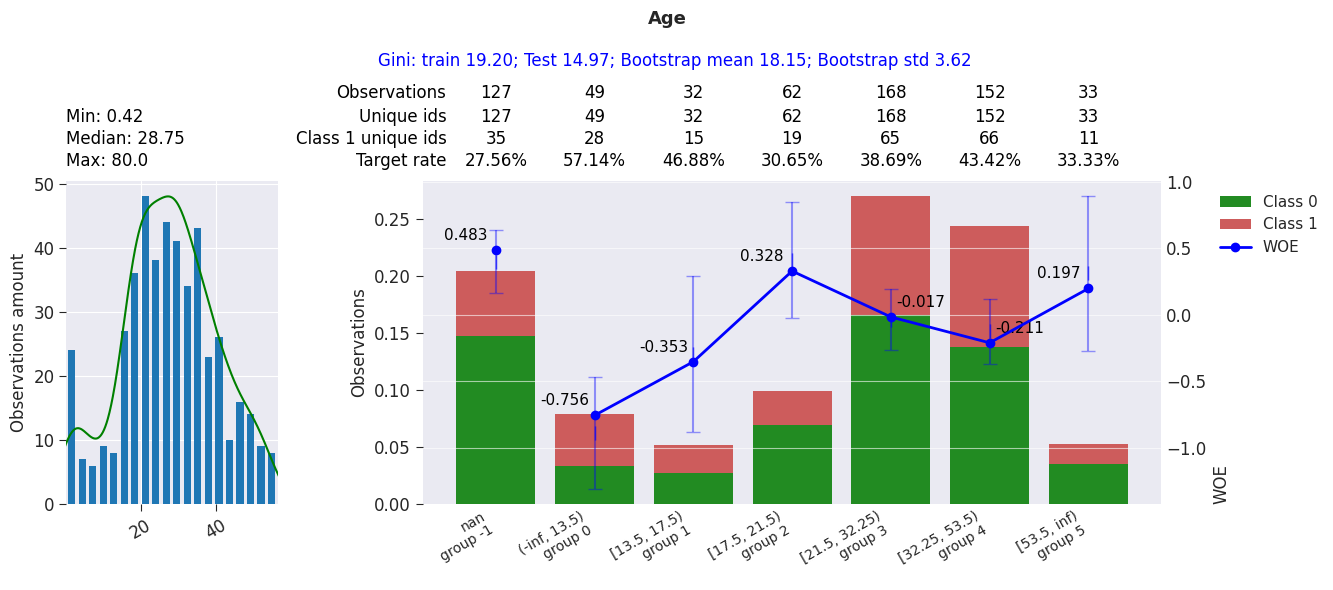

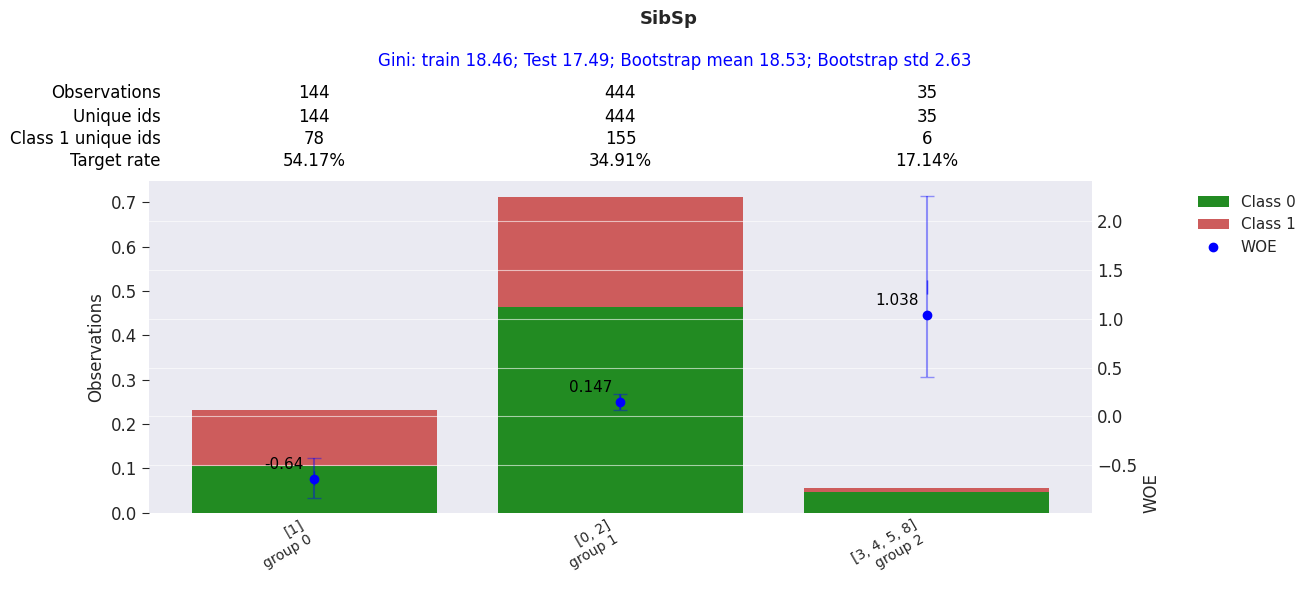

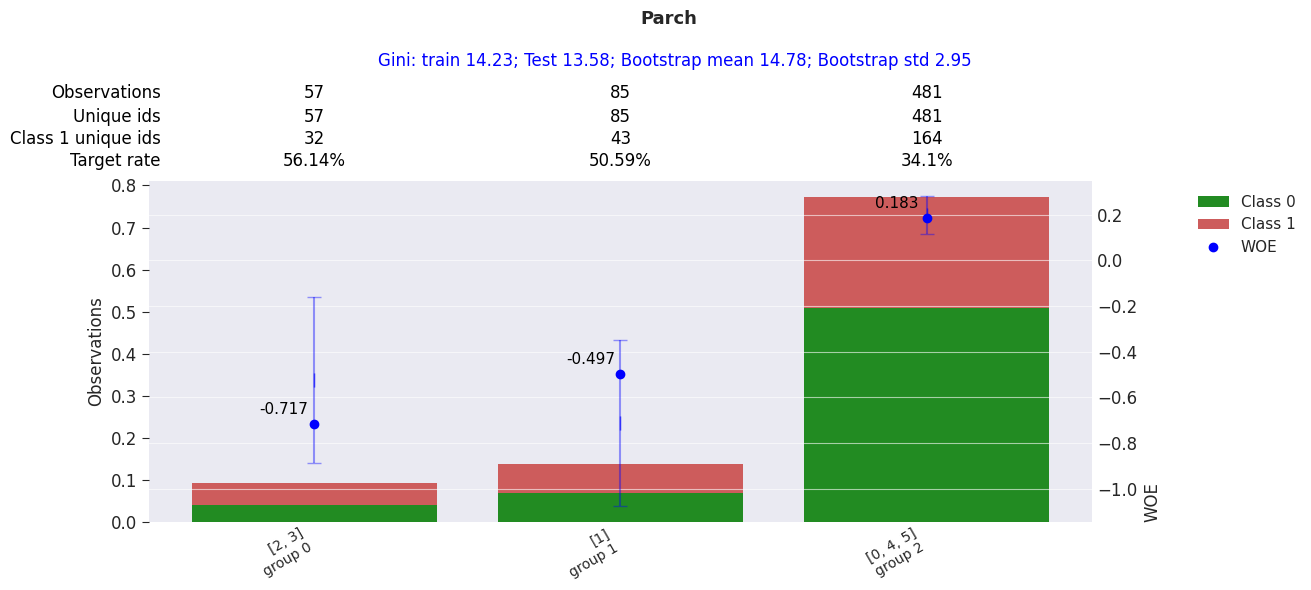

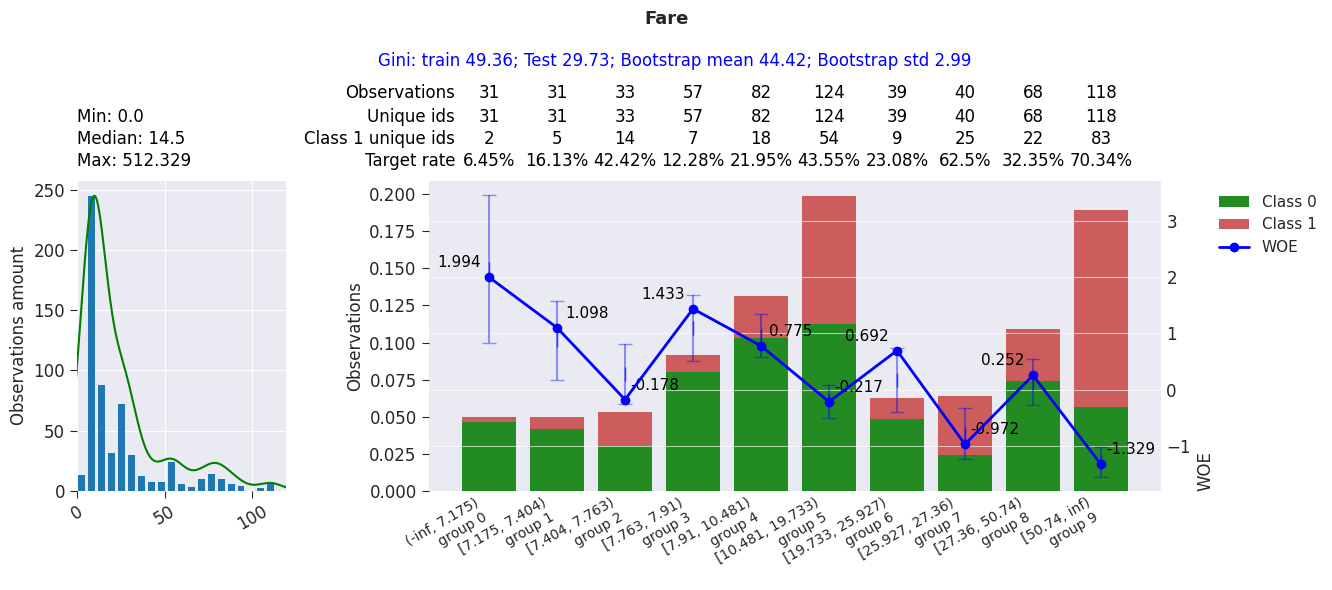

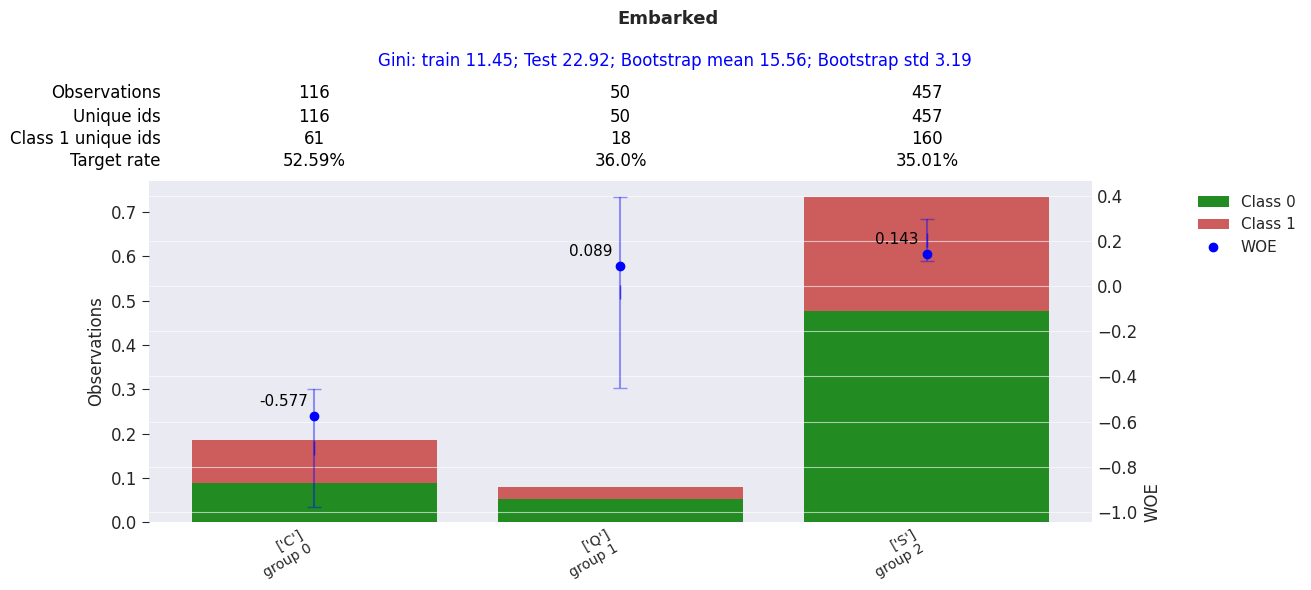

In [8]:
"""
Пересчет биннинга для списка переменных
:param features: список переменных для обработки. При None обрабатываются list(self.feature_woes) + list(self.cross_features)
:param new_groups: False - пересчитаются только WOE в биних,
                   True - также пересчитываются и границы бинов
:param plot_flag: флаг для вывода графиков с биннингом

--- Метод биннинга ---
:param method: 'tree' - биннинг деревом, 'opt' - биннинг деревом с последующей оптимизацией границ бинов библиотекой optbinning
:param max_n_bins: максимальное кол-во бинов
:param min_bin_size: минимальное число (доля) наблюдений в каждом листе дерева.
                        Если min_bin_size < 1, то трактуется как доля наблюдений от обучающей выборки

--- Параметры биннинга для метода 'tree' ---
:param criterion: критерий расщепления. Варианты значений: 'entropy', 'gini'
:param scoring: метрика для оптимизации
:param max_depth: максимальная глубина дерева

--- Параметры биннинга для метода 'opt' ---
:param monotonic: флаг для оптимизации биннинга к монотонному тренду
:param solver: солвер для оптимизации биннинга:
                'cp' - constrained programming
                'mip' - mixed-integer programming
                'ls' - LocalSorver (www.localsorver.com)
:param divergence: метрика для максимизации:
                'iv' - Information Value,
                'js' - Jensen-Shannon,
                'hellinger' - Hellinger divergence,
                'triangular' - triangular discrimination
"""  
binning.fit(features=None, new_groups=True, plot_flag=True, method='tree', max_n_bins=10, min_bin_size=0.05,
            criterion='entropy', scoring='neg_log_loss', max_depth=None, monotonic=False, solver='cp', divergence='iv')       

In [9]:
"""
Поиск оптимального биннинга, удовлетворяющего набору проверок. Итерационно для каждой переменной выполняются следующие шаги:
    1) Исходное разбиение на n бинов, где n на первой итерации равно max_n_bins
    2) Выполняются слияния соседних бинов с близким WOE (при выставленном флаге WOEM_on=True) и малых бинов (SM_on=True)
    3) Проводятся проверки на бизнес-логику (BL_on=True), джини (G_on=True) и стабильность тренда (WOEO_on=True)
    4) Если любая из проверок проваливается, то уменьшаем n на 1 и возвращаемся на шаг 1
Если после перебора всех n проверки так и не успешны, то переменная исключается из списка.
В случае, если задан params_space, то вся процедура повторяется для каждого набора параметров и
затем выбирается биннинг с наибольшим джини.

:param features: список переменных для обработки. При None обрабатываются все self.feature_woes
:param autofit_folder: название папки, в которую будут сохранены результаты автобиннинга
:param plot_flag: флаг для вывода графиков с биннингом:
                    -1 - графики не строить
                    0, False - графики сохранить в папку autofit_folder/Figs_binning, но не выводить в аутпут
                    1, True - графики сохранить в папку autofit_folder/Figs_binning и вывести в аутпут
:param verbose: флаг для вывода подробных комментариев в процессе работы

--- Метод биннинга ---
:param method: 'tree' - биннинг деревом, 'opt' - биннинг деревом с последующей оптимизацией границ бинов библиотекой optbinning
:param max_n_bins: максимальное кол-во бинов
:param min_bin_size: минимальное число (доля) наблюдений в каждом листе дерева.
                        Если min_bin_size < 1, то трактуется как доля наблюдений от обучающей выборки

--- Параметры биннинга для метода 'tree' ---
:param criterion: критерий расщепления. Варианты значений: 'entropy', 'gini', 'log_loss'
:param scoring: метрика для оптимизации
:param max_depth: максимальная глубина дерева

--- Параметры биннинга для метода 'opt' ---
:param solver: солвер для оптимизации биннинга:
                'cp' - constrained programming
                'mip' - mixed-integer programming
                'ls' - LocalSorver (www.localsorver.com)
:param divergence: метрика для максимизации:
                'iv' - Information Value,
                'js' - Jensen-Shannon,
                'hellinger' - Hellinger divergence,
                'triangular' - triangular discrimination

--- Параметры проверок ---
:param pvalue: уровень значимости для оценки доверительных интервалов. z = stats.norm.ppf(1 - pvalue / 2)
:param WOEM_on: флаг проверки на разницу WOE между соседними бинами
:param WOEM_woe_threshold: минимальная разрешенная дельта WOE между соседними бинами
:param WOEM_with_missing: должна ли выполняться проверка для бина с пустыми значениями
:param SM_on: флаг проверки на размер бина
:param SM_target_threshold: минимальное кол-во (доля) наблюдений с целевым событием в бине
:param SM_size_threshold: минимальное кол-во (доля) наблюдений в бине
:param BL_on: флаг проверки на бизнес-логику
:param BL_allow_Vlogic_to_increase_gini: разрешить V-образную бизнес-логику, если она приводит к увеличению джини переменной на эту величину относительного монотонного тренда.
                                         При значении 100 V-образная бизнес-логика запрещена
:param G_on: флаг проверки на джини
:param G_gini_threshold: минимальное допустимое джини переменной.
        Проверяется на трэйне + если заданы бутстрэп сэмплы, то проверяется на них условие mean-z*std > G_gini_threshold
:param G_with_test: так же проверяется джини на всех остальных доступных сэмплах.
:param G_gini_decrease_threshold: допустимое уменьшение джини на всех сэмплах относительно трэйна.
        В случае, если значение >= 1, то проверяется условие gini(train) - gini(sample) <= G_gini_decrease_threshold для основных сэмплов
                                                           и z*std <= G_gini_decrease_threshold для бутсрэп сэмплов
                  если значение < 1, то проверяется условие 1 - gini(sample)/gini(train) <= G_gini_decrease_threshold для основных сэмплов
                                                          и z*std/mean <= G_gini_decrease_threshold для бутсрэп сэмплов
:param G_gini_increase_restrict: такое же ограничение действует и на увеличение джини
:param WOEO_on: флаг проверки на сохранение тренда WOE
:param WOEO_analytic: всегда считать доверительные интервалы аналитически
:param WOEO_all_samples: проверять сохранение тренда WOE на всех сэмплах относительно трейна

--- Пространство параметров ---
:param params_space: пространство параметров, с которыми будут выполнены автобиннинги.
        Задается в виде словаря {параметр: список значений}
:param woe_best_samples: список сэмплов, джини которых будет учитываться при выборе лучшего биннинга.  При None берется джини на трэйне

--- Кросс переменные ---
:param cross_features_first_level: список переменных первого уровня для которых будут искаться лучшие кросс пары. При None берется features
:param cross_num_second_level: кол-во кросс пар, рассматриваемых для каждой переменной первого уровня
                                   0 - поиск не производится
                                   -1 - рассматриваются все возможные кросс пары
                                   n - для каждой переменной первого уровня отбираются n лучших переменных с максимальной метрикой criterion
"""
binning.auto_fit(features=None, autofit_folder='auto_fit', plot_flag=-1, verbose=False,
                 params_space=None, woe_best_samples=None, method='opt', max_n_bins=10, min_bin_size=0.05,
                 criterion='entropy', scoring='neg_log_loss', max_depth=5, solver='cp', divergence='iv', pvalue=0.05,
                 WOEM_on=True, WOEM_woe_threshold=0.05, WOEM_with_missing=False,
                 SM_on=False, SM_target_threshold=5, SM_size_threshold=100,
                 BL_on=True, BL_allow_Vlogic_to_increase_gini=10,
                 G_on=False, G_gini_threshold=5, G_with_test=False, G_gini_decrease_threshold=0.2, G_gini_increase_restrict=False,
                 WOEO_on=True, WOEO_analytic=True, WOEO_all_samples=False,
                 cross_features_first_level=None, cross_num_second_level=1)

[INFO] [2023-06-20 14:08:39] ------------------------------------------------------------------------ SFA -------------------------------------------------------------------------
[INFO] [2023-06-20 14:08:39] Performing autobinning with parameters space of size 1...
[INFO] [2023-06-20 14:08:39] Using parameters set 1/1: {'method': 'opt', 'max_n_bins': 10, 'min_bin_size': 0.05, 'criterion': 'entropy', 'scoring': 'neg_log_loss', 'max_depth': 5, 'solver': 'cp', 'divergence': 'iv', 'pvalue': 0.05, 'WOEM_on': True, 'WOEM_woe_threshold': 0.05, 'WOEM_with_missing': False, 'SM_on': False, 'SM_target_threshold': 5, 'SM_size_threshold': 100, 'G_on': False, 'G_gini_threshold': 5, 'G_gini_decrease_threshold': 0.2, 'G_gini_increase_restrict': False, 'G_with_test': False, 'BL_on': True, 'BL_allow_Vlogic_to_increase_gini': 10, 'WOEO_on': True, 'WOEO_analytic': True, 'WOEO_all_samples': False, 'verbose': False}
[INFO] [2023-06-20 14:08:39] Processing 8 features on 1 CPU...


100%|██████████| 8/8 [00:01<00:00,  5.53it/s]


[INFO] [2023-06-20 14:08:41] Excluded features ['PassengerId', 'Age'] because no suitable binning was found for them
[INFO] [2023-06-20 14:08:41] Performing autobinning for cross features with parameters space of size 1...
[INFO] [2023-06-20 14:08:41] Finding the best pairs to first-level features...


100%|██████████| 6/6 [00:00<00:00, 12.41it/s]

[INFO] [2023-06-20 14:08:41] Creating feature_crosses...



100%|██████████| 6/6 [00:00<00:00, 27.08it/s]

[INFO] [2023-06-20 14:08:41] Using parameters set 1/1: {'method': 'opt', 'max_n_bins': 10, 'min_bin_size': 0.05, 'criterion': 'entropy', 'scoring': 'neg_log_loss', 'max_depth': 5, 'solver': 'cp', 'divergence': 'iv', 'pvalue': 0.05, 'WOEM_on': True, 'WOEM_woe_threshold': 0.05, 'WOEM_with_missing': False, 'SM_on': False, 'SM_target_threshold': 5, 'SM_size_threshold': 100, 'G_on': False, 'G_gini_threshold': 5, 'G_gini_decrease_threshold': 0.2, 'G_gini_increase_restrict': False, 'G_with_test': False, 'BL_on': True, 'BL_allow_Vlogic_to_increase_gini': 10, 'WOEO_on': True, 'WOEO_analytic': True, 'WOEO_all_samples': False, 'verbose': False}
[INFO] [2023-06-20 14:08:41] Processing 6 first level features on 1 CPU...



  0%|          | 0/6 [00:00<?, ?it/s]

[INFO] [2023-06-20 14:08:42] Current binning for cross_Parch&Fare:
 group                     values    woe   n  n1
[0, 0]  [0, 4, 5] & [-inf, 9.492]  0.998 216  40
[0, 1] [0, 4, 5] & [9.492, 50.74]  0.115 191  68
[0, 2]   [0, 4, 5] & [50.74, inf] -1.591  74  56
[1, 0]    [1, 2, 3] & [-inf, inf] -0.586 142  75


 17%|█▋        | 1/6 [00:00<00:03,  1.58it/s]

[INFO] [2023-06-20 14:08:43] Current binning for cross_SibSp&Fare:
 group                             values    woe   n  n1
[0, 0] [0, 2, 3, 4, 5, 8] & [-inf, 9.288]  0.939 211  41
[0, 1] [0, 2, 3, 4, 5, 8] & [9.288, 48.2]  0.018 198  75
[0, 2]   [0, 2, 3, 4, 5, 8] & [48.2, inf] -1.053  70  45
[1, 0]               [1] & [-inf, 38.002] -0.046  89  35
[1, 1]                [1] & [38.002, inf] -1.721  55  43


 33%|███▎      | 2/6 [00:01<00:03,  1.29it/s]

[INFO] [2023-06-20 14:08:44] Current binning for cross_Pclass&Fare:
 group                 values    woe   n  n1
[0, 0]      [3] & [-inf, inf]  0.721 337  78
[1, 0] [1, 2] & [-inf, 13.25]  0.208  69  23
[1, 1]  [1, 2] & [13.25, inf] -1.029 217 138


 50%|█████     | 3/6 [00:02<00:02,  1.22it/s]

[INFO] [2023-06-20 14:08:44] Current binning for cross_Fare&Parch:
 group                               values    woe   n  n1
[0, 0]           [-inf, 10.481] & [0, 1, 2]  0.925 234  46
[1, 0] [10.481, 50.74] & [0, 1, 2, 3, 4, 5] -0.095 271 110
[2, 0]             [50.74, inf] & [0, 1, 2] -1.329 118  83


 67%|██████▋   | 4/6 [00:02<00:01,  1.54it/s]

[INFO] [2023-06-20 14:08:45] Current binning for cross_Sex&Fare:
 group                      values    woe   n  n1
[0, 0]     ['male'] & [-inf, 7.91]  2.251 121   7
[0, 1]   ['male'] & [7.91, 26.144]  1.065 166  29
[0, 2]    ['male'] & [26.144, inf]  0.137 117  41
[1, 0] ['female'] & [-inf, 31.331] -1.025 148  94
[1, 1]  ['female'] & [31.331, inf] -3.448  71  68


 83%|████████▎ | 5/6 [00:03<00:00,  1.63it/s]

[INFO] [2023-06-20 14:08:45] Current binning for cross_Embarked&Fare:
 group                       values    woe   n  n1
[0, 0]  ['Q', 'S'] & [-inf, 12.312]  0.894 233  47
[0, 1] ['Q', 'S'] & [12.312, 50.74] -0.087 203  82
[0, 2]    ['Q', 'S'] & [50.74, inf] -1.263  71  49
[1, 0]       ['C'] & [-inf, 40.852]  0.095  64  23
[1, 1]        ['C'] & [40.852, inf] -1.451  52  38


100%|██████████| 6/6 [00:04<00:00,  1.48it/s]


[INFO] [2023-06-20 14:08:46] Scorecard saved to the file titanic_output/auto_fit_scorecard.xlsx
[INFO] [2023-06-20 14:08:46] All done! 6/8 features successfully binned. Found 5 cross features.


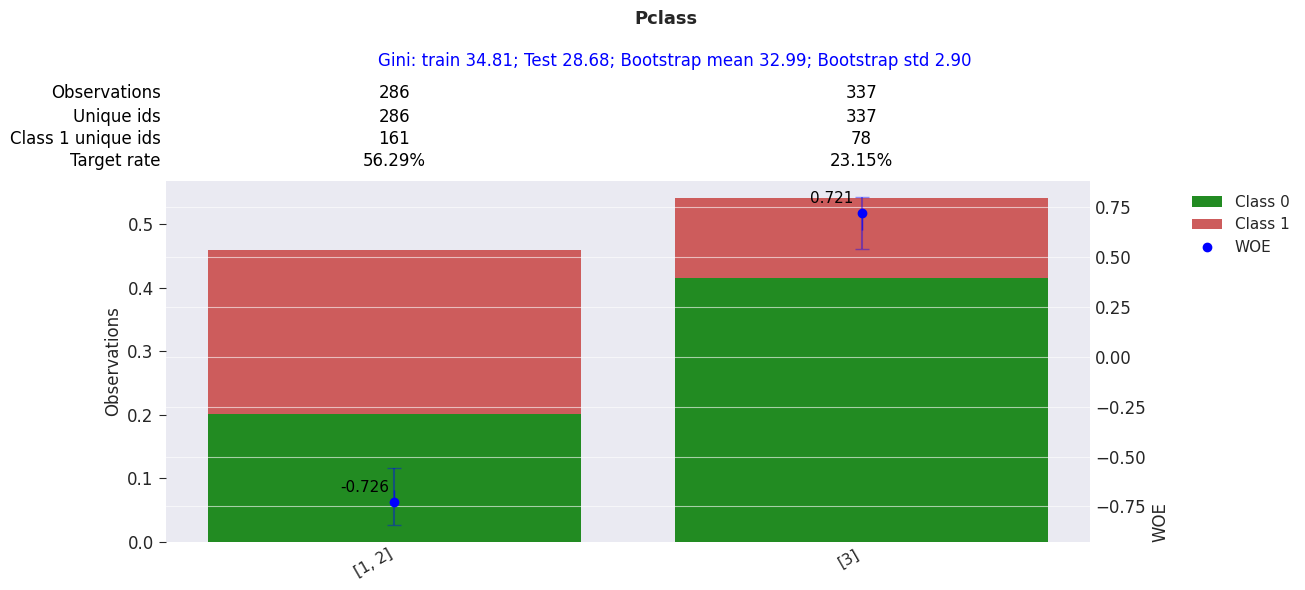

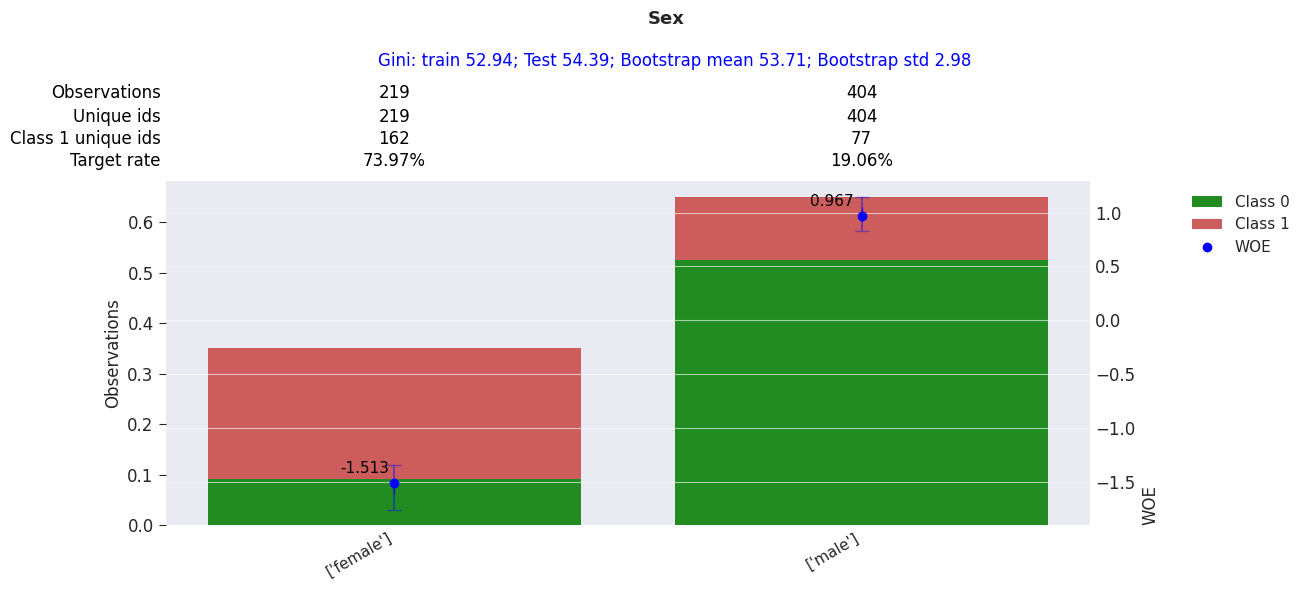

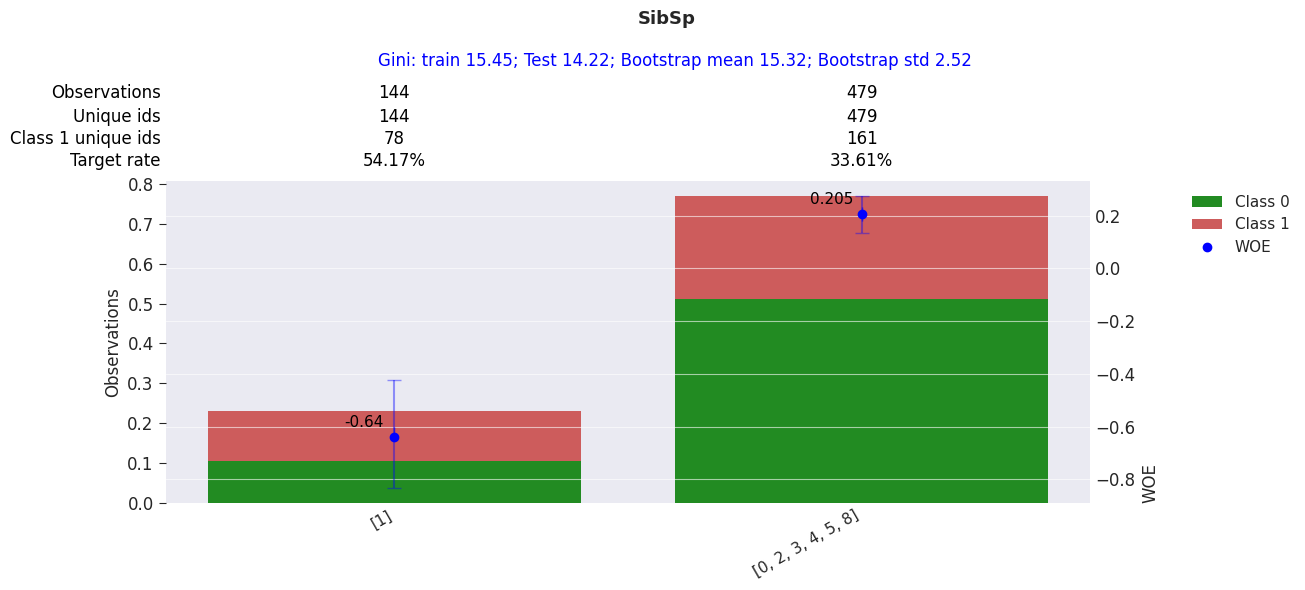

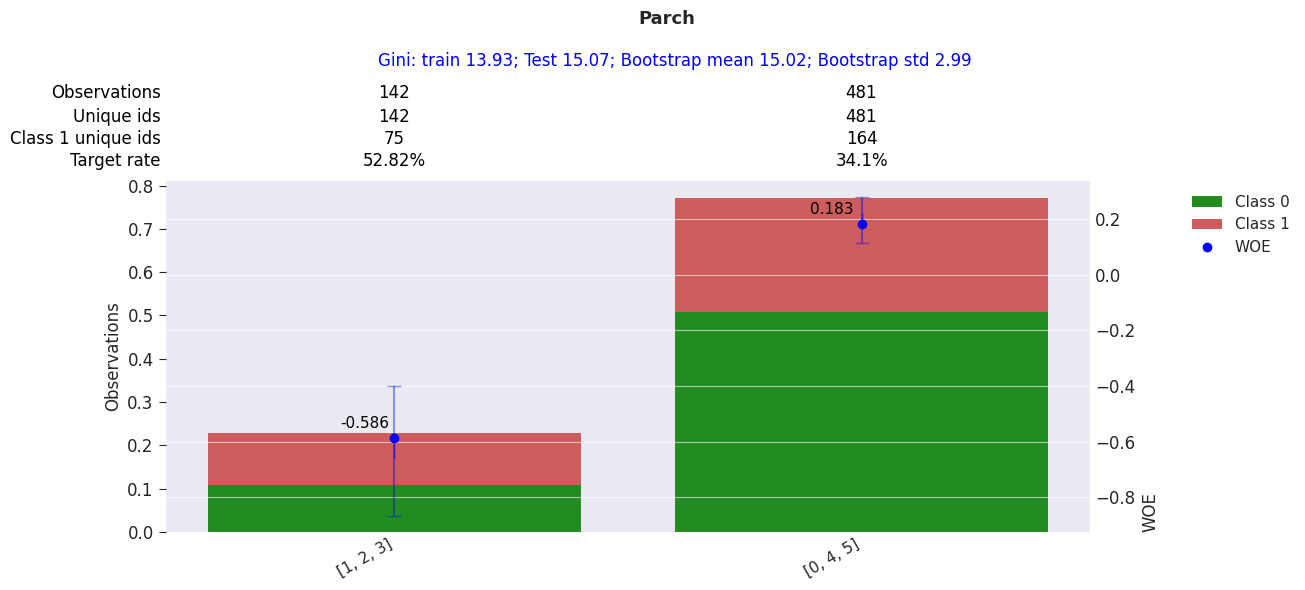

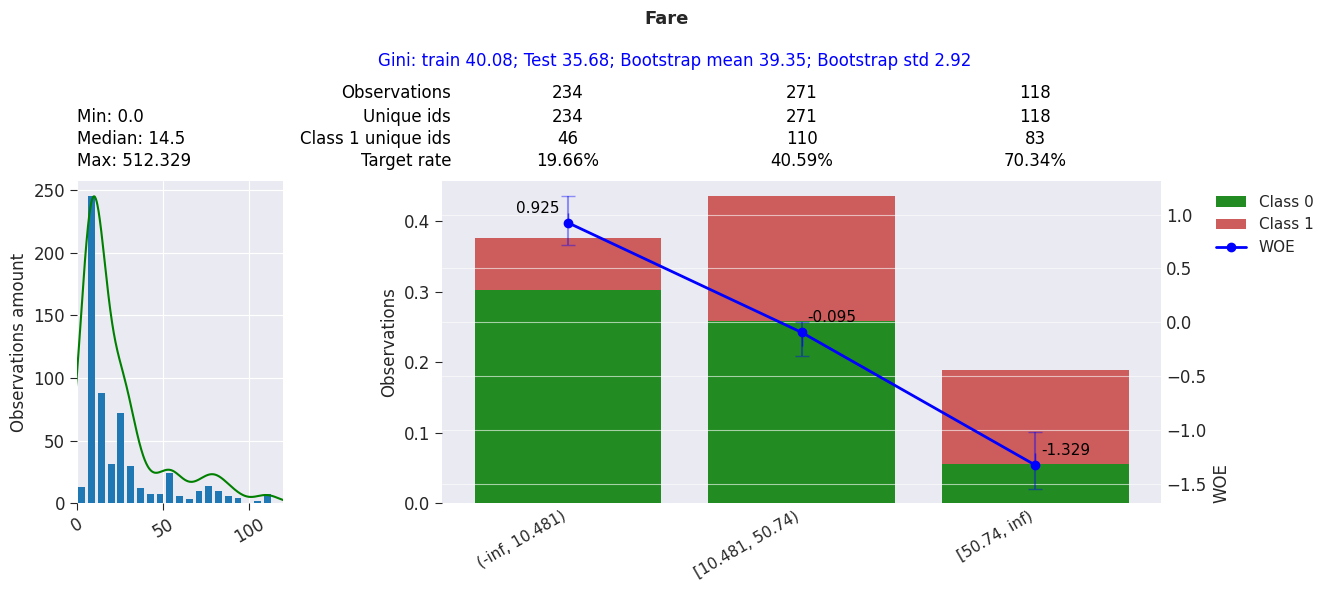

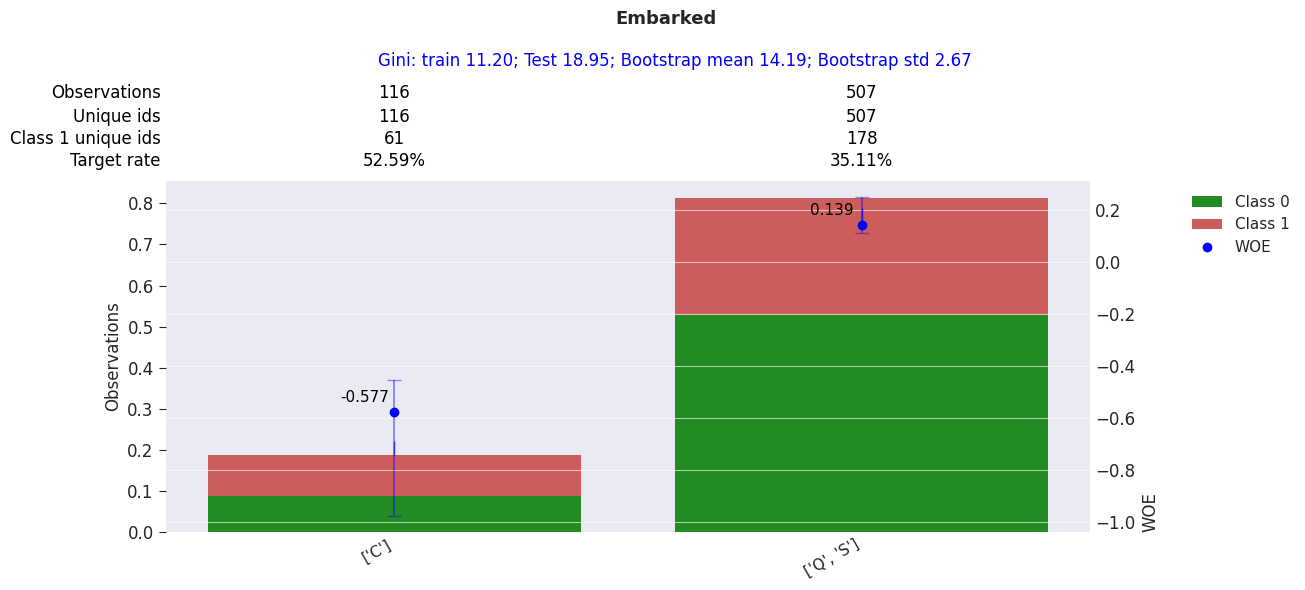

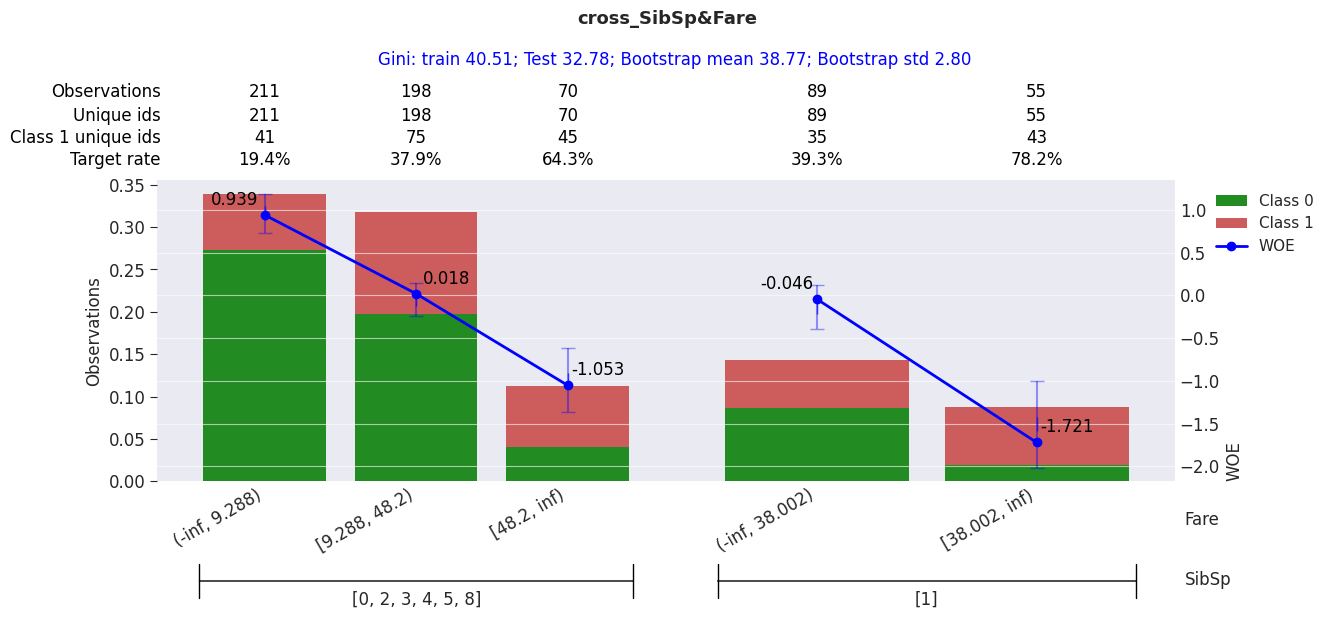

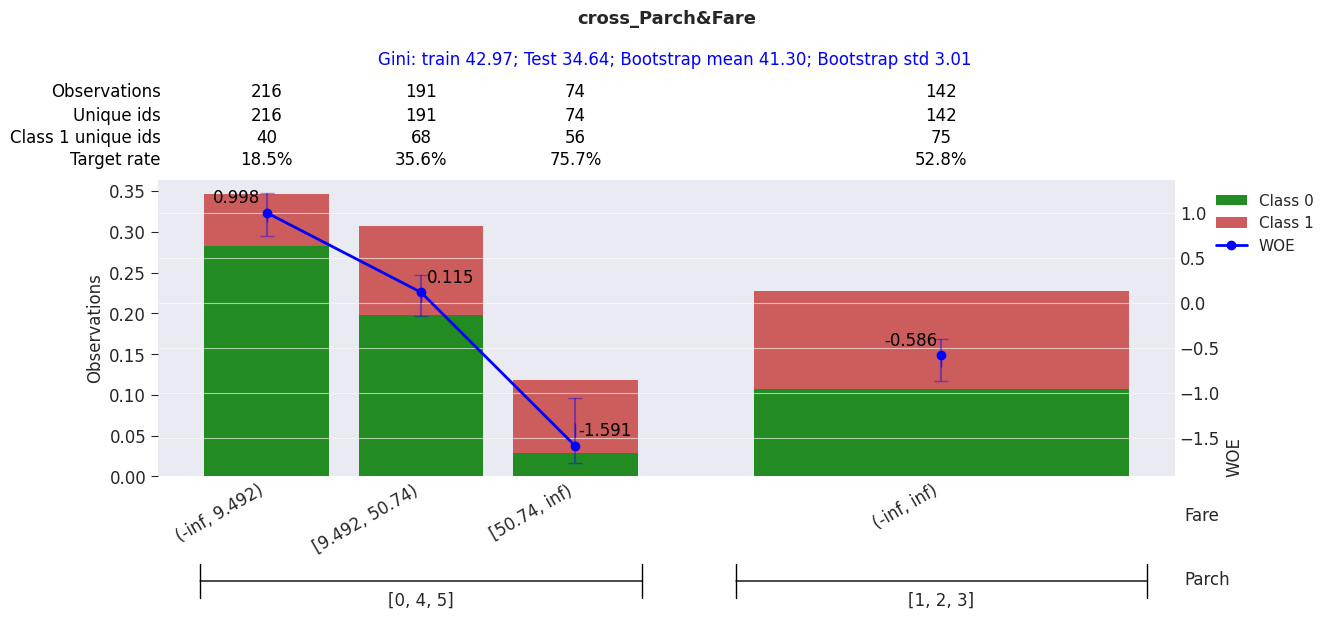

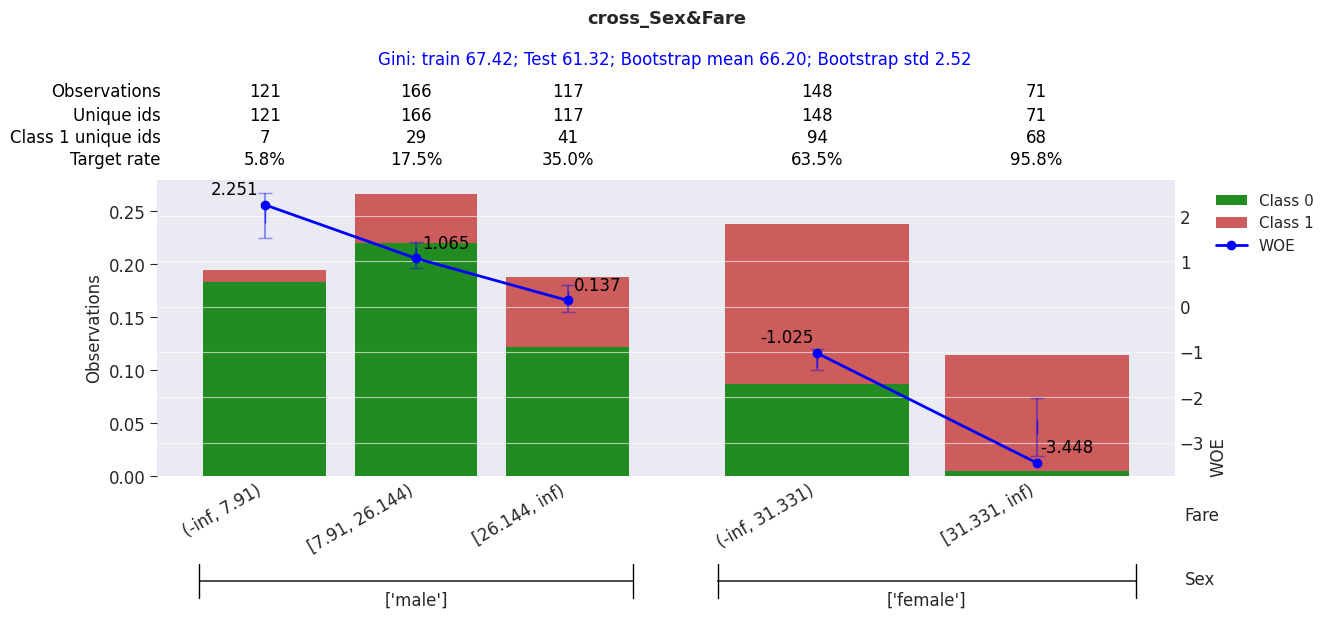

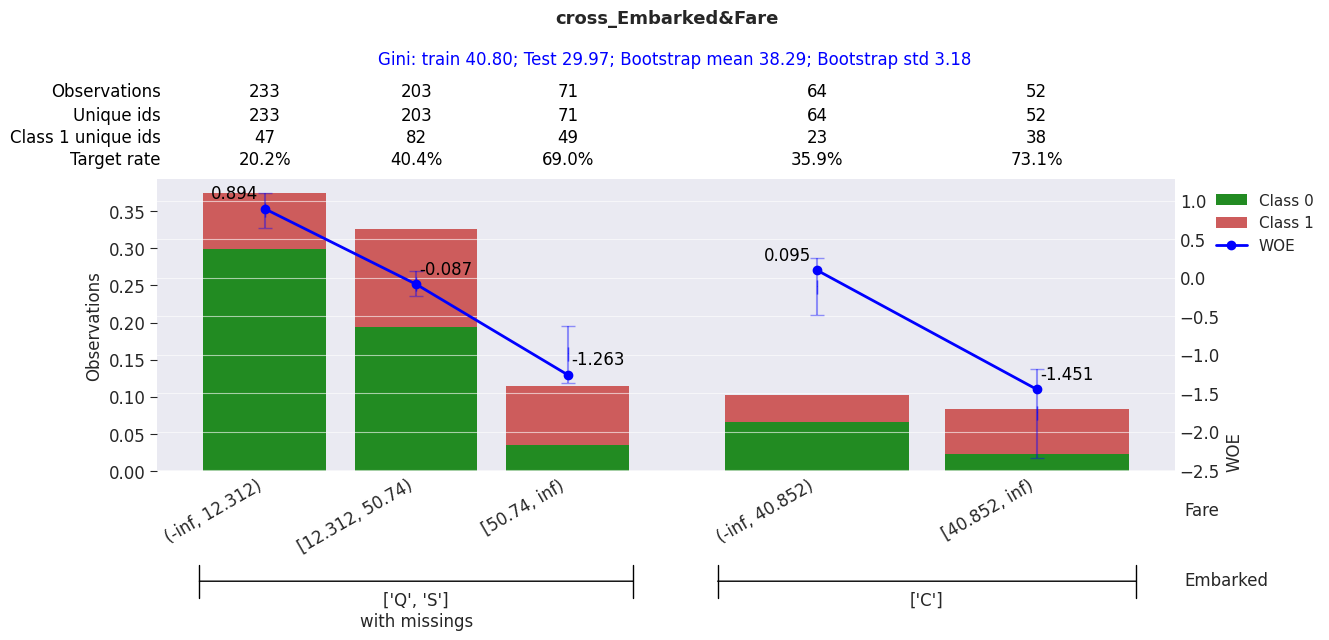

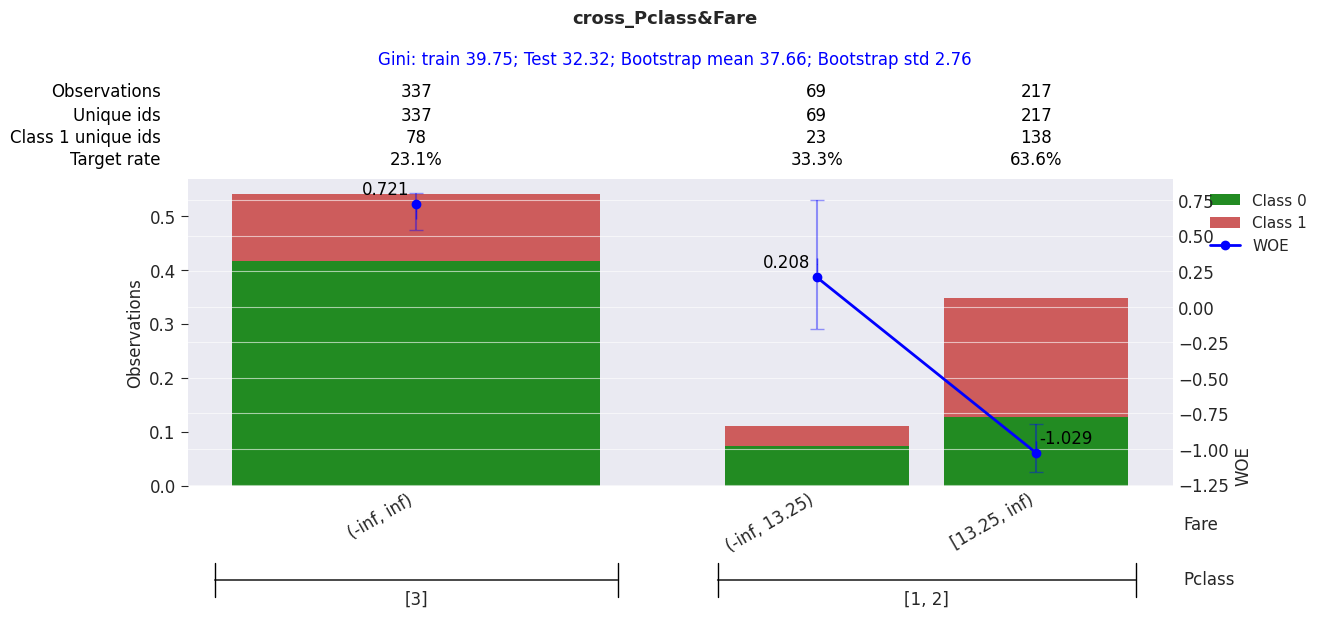

[<Figure size 1350x600 with 2 Axes>,
 <Figure size 1350x600 with 2 Axes>,
 <Figure size 1350x600 with 2 Axes>,
 <Figure size 1350x600 with 2 Axes>,
 <Figure size 1350x600 with 4 Axes>,
 <Figure size 1350x600 with 2 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>]

In [10]:
"""
Отрисовка биннинга
:param features: список переменных для обработки. При None отрисоываются все активные переменные
:param folder: папка, в которую должны быть сохранены рисунки. При None не сохраняются
:param plot_flag: флаг для вывода рисунка
:param show_groups: флаг для отображения номер групп на рисунке
:param verbose: флаг для отображения счетчика обработанных рисунков
:param all_samples: отрисовка бинов по всем сэмплам, может принимать значения:
                    0, False - строятся бины только на трэйне
                    1, True – строятся бины по всем сэмплам, таргет рейт указывается только для трэйна
                    >1  – строятся бины и таргет рейт указывается по всем сэмплам
:param pvalue: уровень значимости для отрисовки доверительных интервалов WOE
:param analytics: всегда считать доверительные интервалы аналитически

:return: список из графиков [plt.figure]
"""
binning.plot_bins(features=None, folder=None, plot_flag=True, show_groups=False, verbose=False, all_samples=False, pvalue=0.05, analytic=False)        

[INFO] [2023-06-20 14:08:59] Age: merging groups [0, 1]


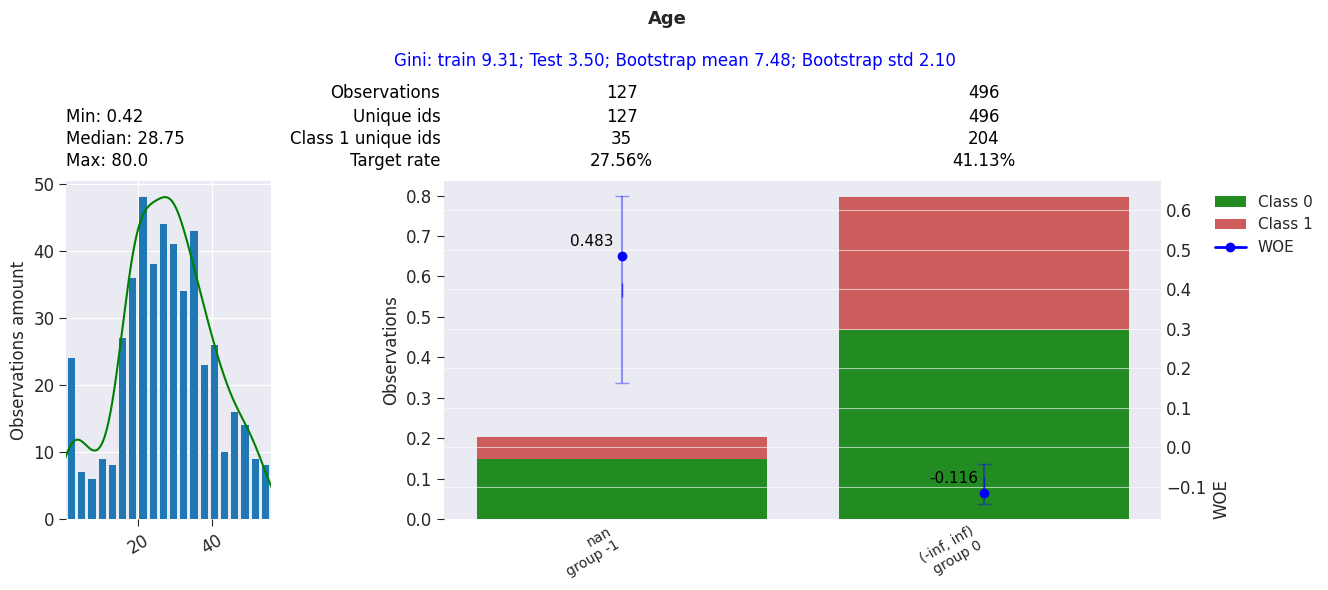

In [11]:
"""
Объединение двух бинов
:param feature: переменная
:param groups_list: [group1, group2] - список из двух бинов для объединения
:param plot_flag: флаг вывода графика после разделения
"""
binning.merge(feature='Age', groups_list=[0, 1], plot_flag=True)        

[INFO] [2023-06-20 14:09:00] Age: splitting group 0
[INFO] [2023-06-20 14:09:00] Splitting started! Feature Age group: 0
[INFO] [2023-06-20 14:09:00] Additional bound 13.5


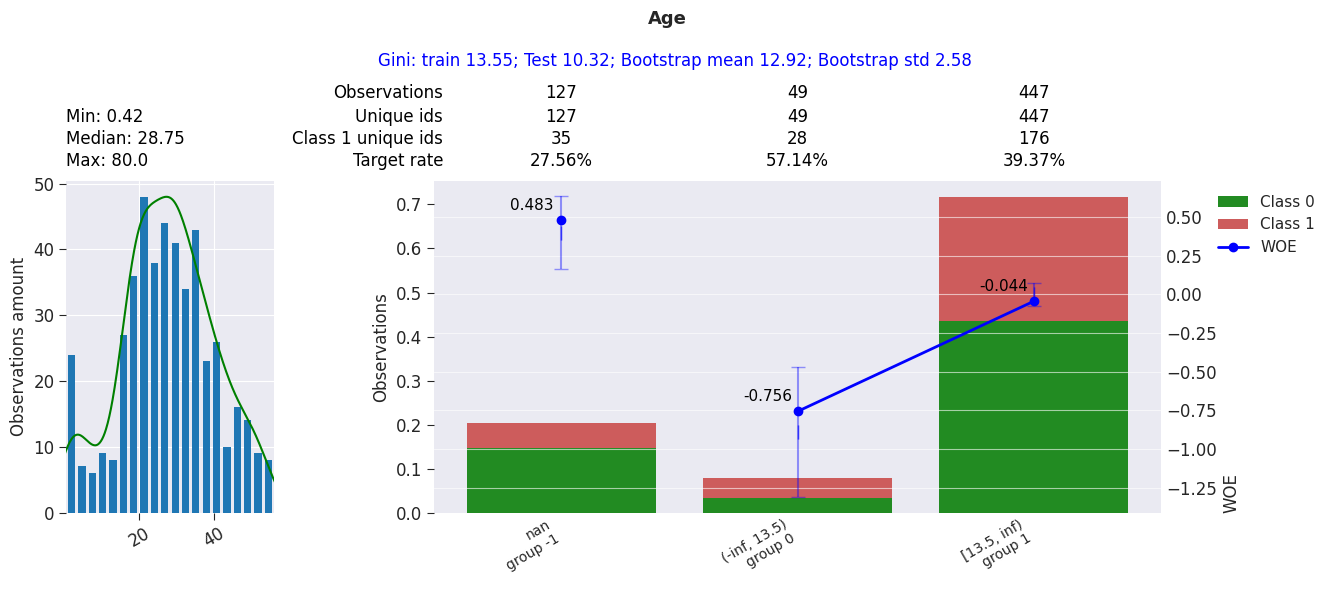

In [12]:
"""
Разделение выбранного бина на две части
:param feature: переменная
:param group: номер бина для разделения, начиная с 0
:param to_add: для числовых - граница между бинами, для категориальных - список значений для выделения в новый бин
:param min_bin_size: минимальное число (доля) наблюдений в каждом бине
:param criterion: критерий расщепления. Варианты значений: 'entropy', 'gini'
:param scoring: метрика для оптимизации
:param plot_flag: флаг вывода графика после разделения
"""
feature = 'Age'
group = 0
binning.split(feature=feature, group=group, to_add=None, min_bin_size=0.05, criterion='entropy', scoring='neg_log_loss', plot_flag=True)        

[INFO] [2023-06-20 14:09:02] Iteration 0


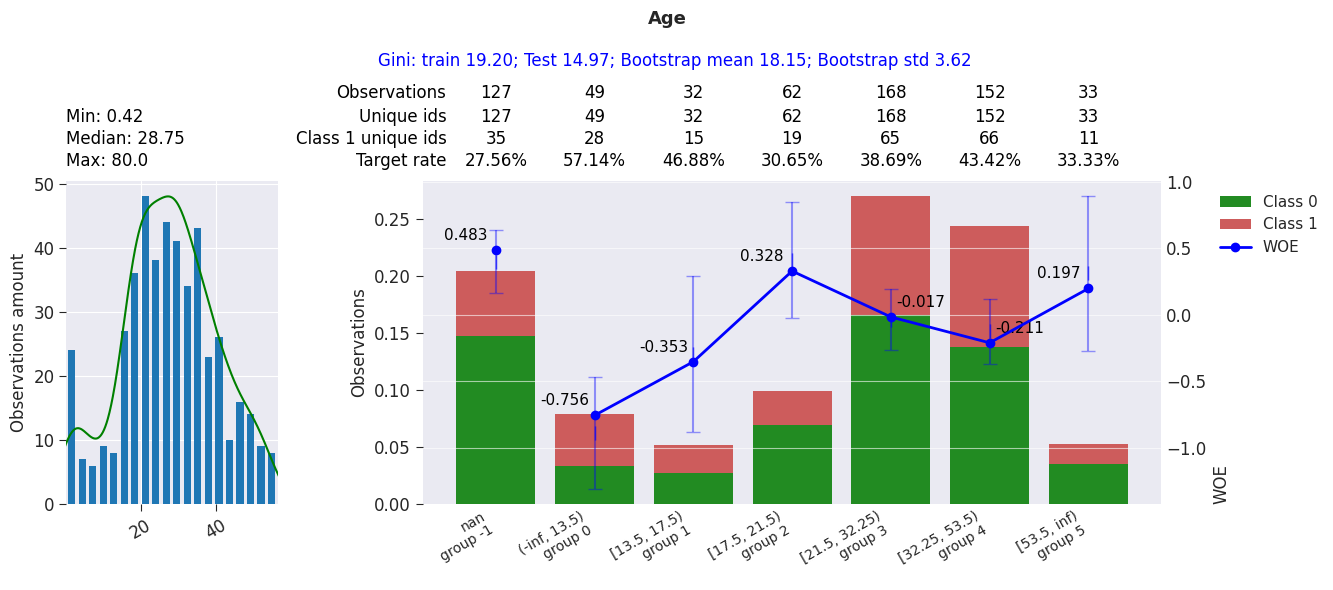

[INFO] [2023-06-20 14:09:03] Iteration 1


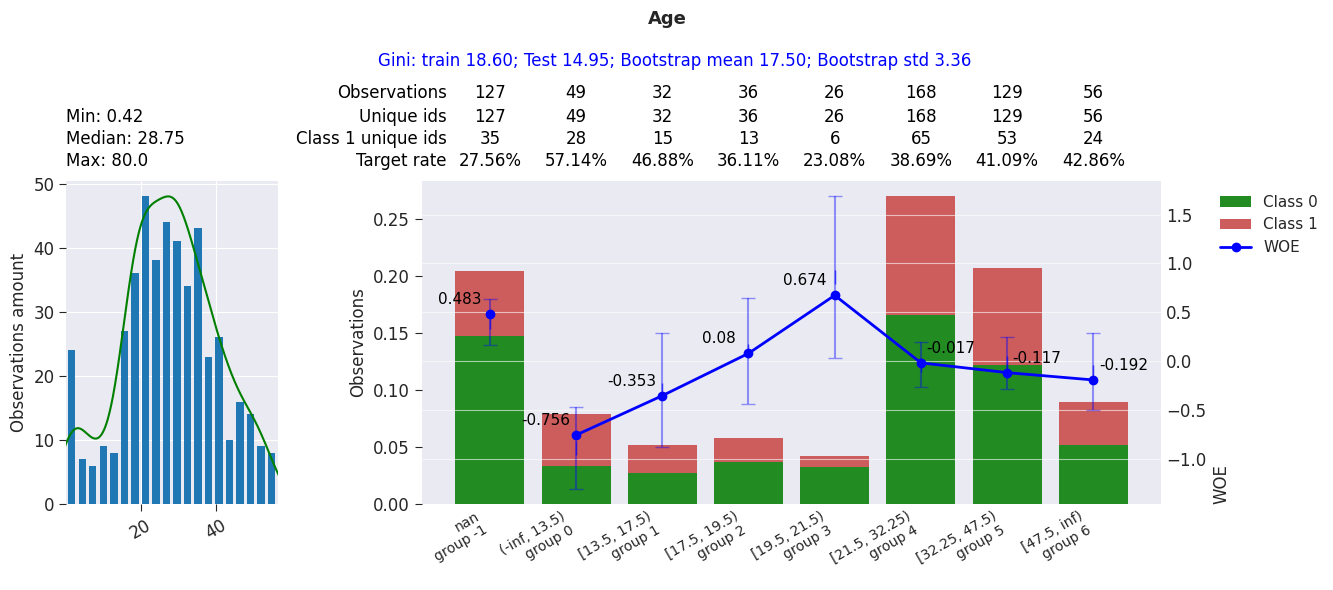

[INFO] [2023-06-20 14:09:05] Iteration 2


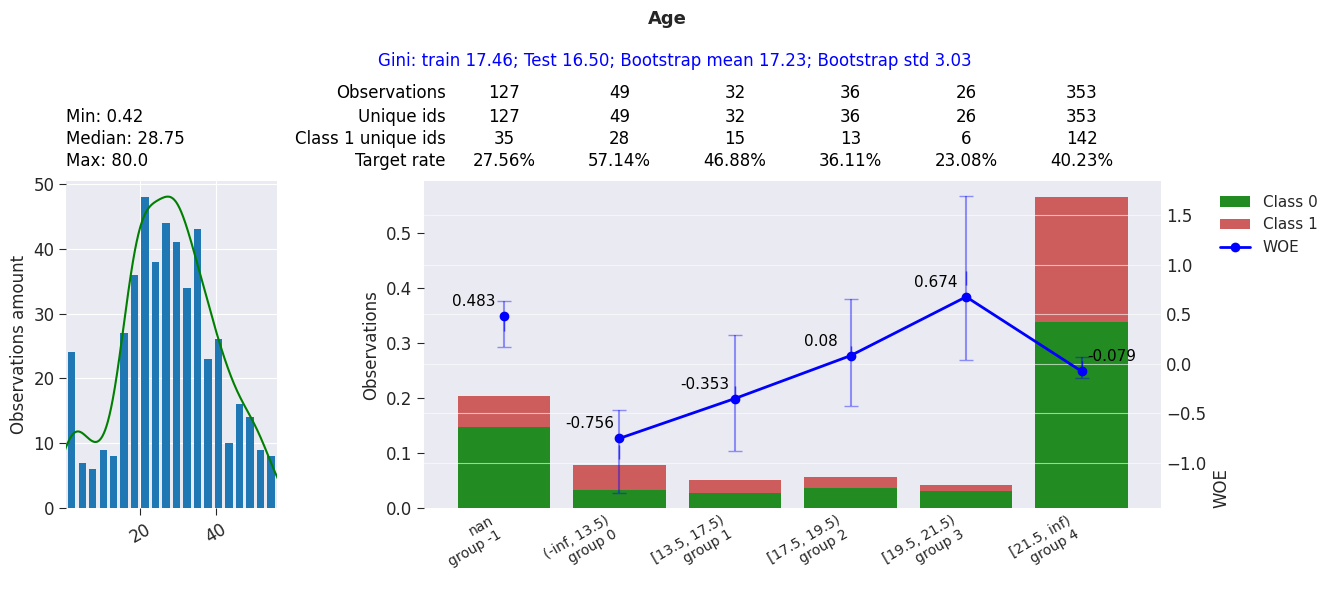

[INFO] [2023-06-20 14:09:07] Iteration 3


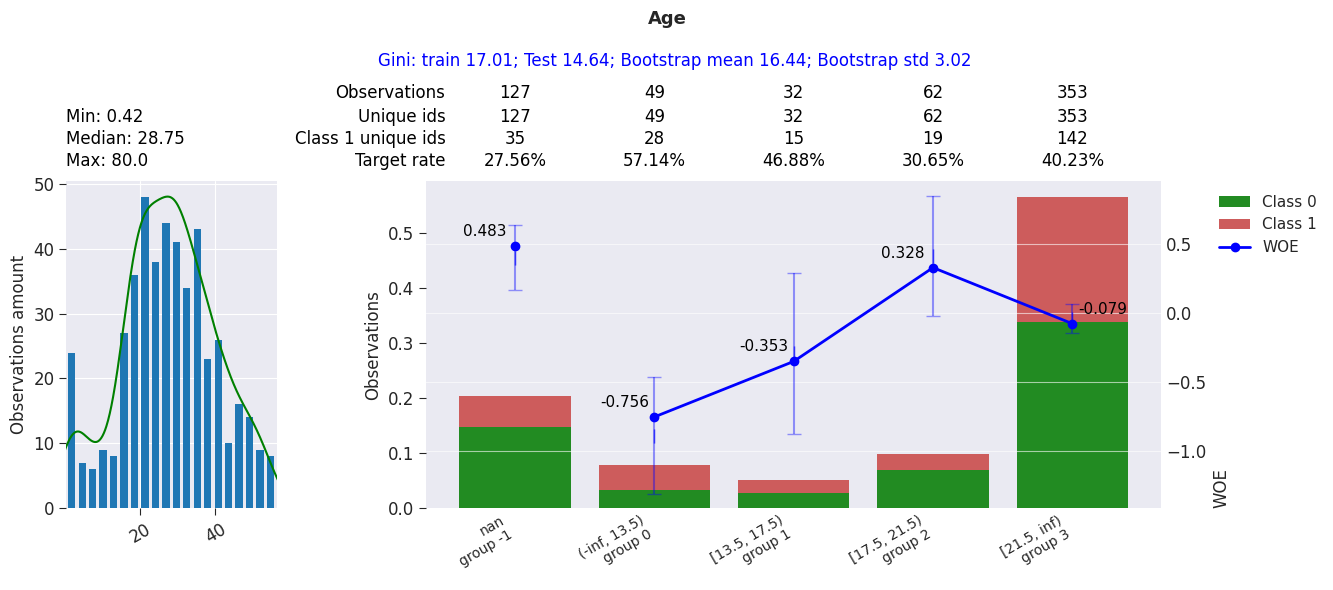

[INFO] [2023-06-20 14:09:08] Iteration 4


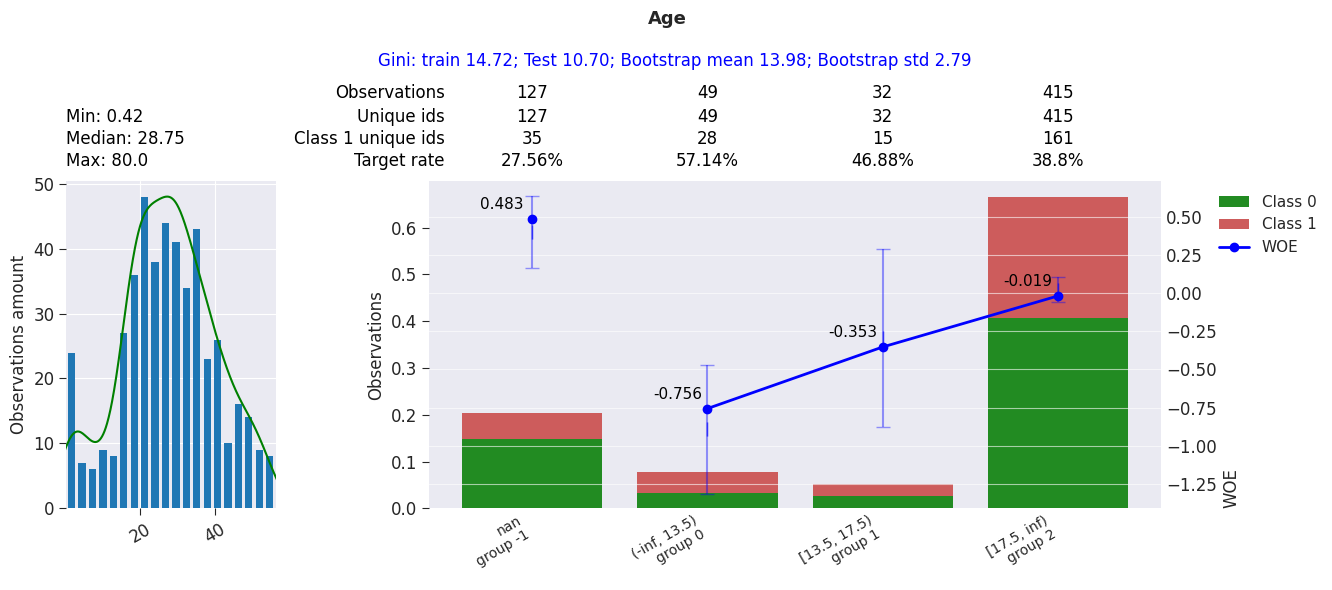

[INFO] [2023-06-20 14:09:10] Iteration 5


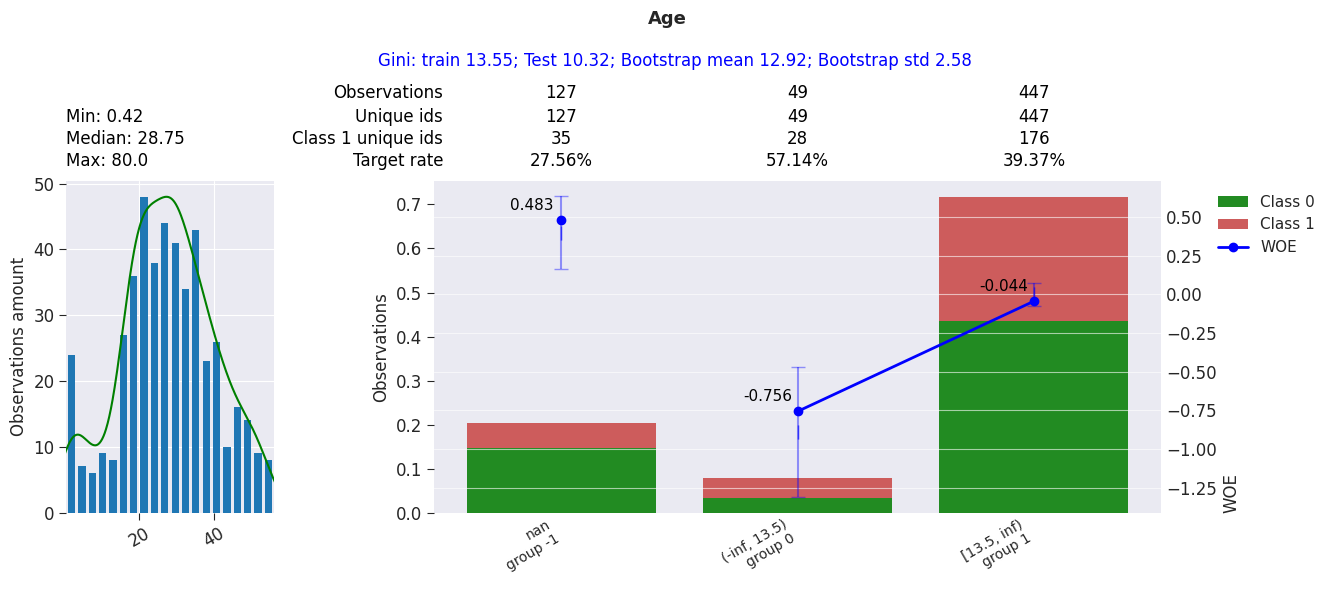

[INFO] [2023-06-20 14:09:11] Iteration 6


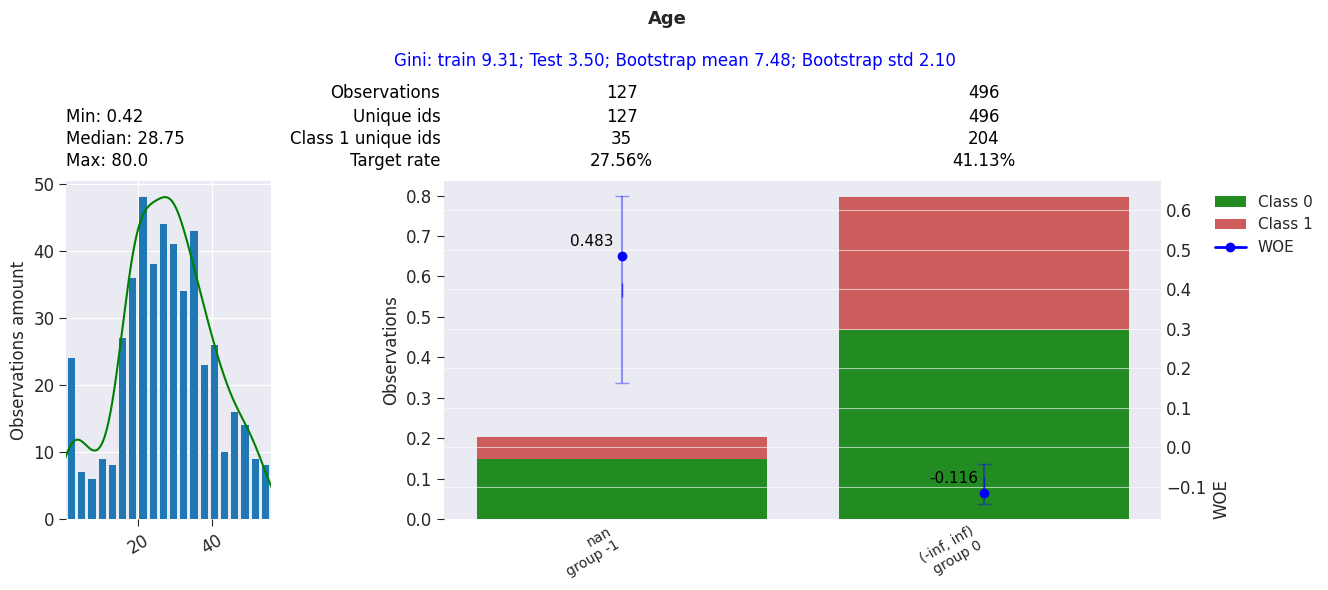

[INFO] [2023-06-20 14:09:12] Iteration 7 (current)


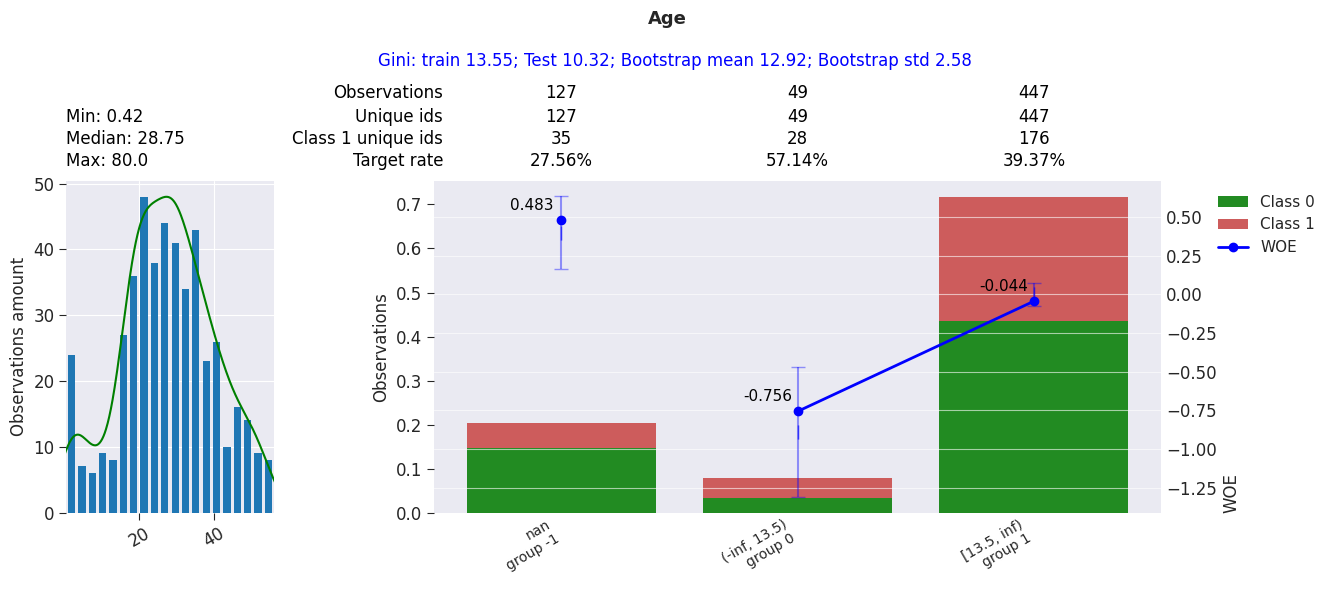

In [13]:
"""
Вывод истории биннинга одной переменной
:param feature: название переменной
"""
binning.show_history(feature='Age')

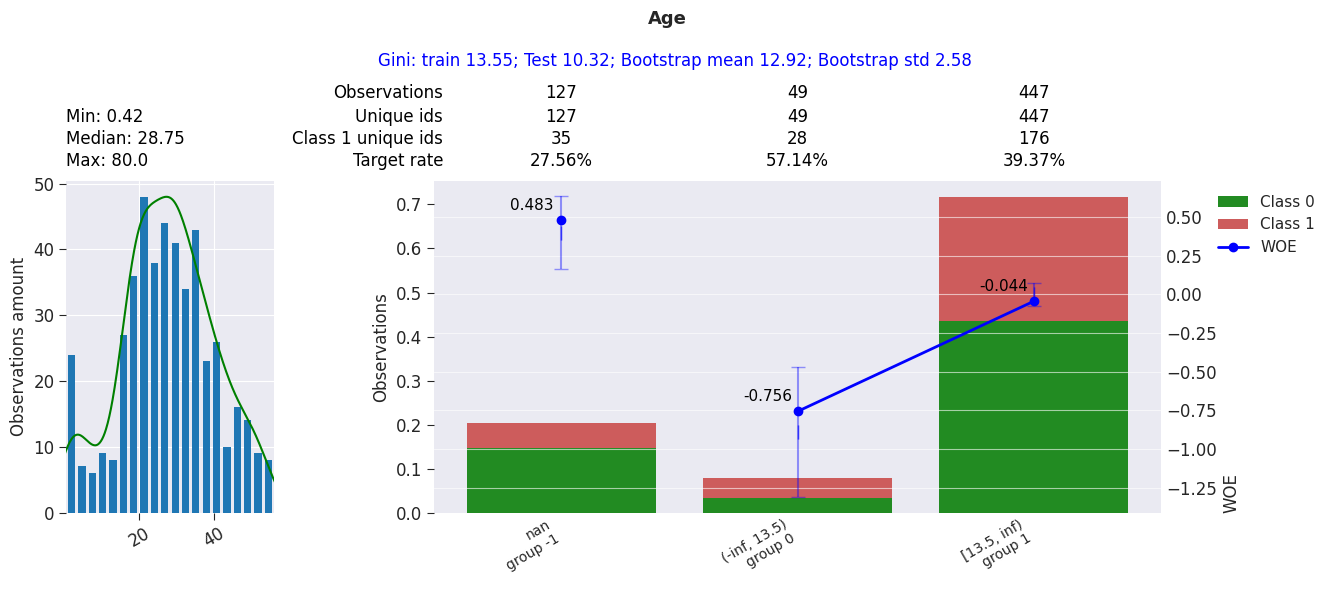

In [14]:
"""
Откат биннинга на одну из предыдущих итераций
:param feature: пемеренная
:param iteration: номер итерации. Возможны отрицательные значения: -1 - последняя итерация, -2 - предпоследняя и т.д.
:param plot_flag: флаг вывода графика после отката
"""
binning.rollback(feature='Age', iteration=None, plot_flag=True)        

In [15]:
"""
Трансформация ДатаСэмпла
:param ds: ДатаСэмпл
:param features: список переменных для трансформации. При None берутся ds.features для которых есть активный биннинг
:param verbose: флаг для вывода комментариев в процессе работы

:return: трансформированный ДатаСэмпл
"""
binning.transform(ds, features=None, verbose=False)        

In [16]:
"""
Сохранение биннинга в файл
:param out: название файла
:param features: список переменных для сохранения. При None сохраняются все, имеющие активный биннинг
:param full: если True, то добавляет в файл поля с доп статистикой по бинам
:param history: если True, то сохраняется вся история биннингов. Дубли биннингов удаляются, текущий биннинг записывается последней итерацией

:return: датафрейм со скоркартой
"""
scorecard = binning.export_scorecard(out=None, features=None, full=True, history=False)   
scorecard

,feature,categorical_type,group,values,woe,missing,n,n0,n1,target_rate,sample_part,n0_part,n1_part,iteration
0,Pclass,int64,0,[3],0.721,0,337.0,259.0,78.0,0.231,0.541,0.674,0.326,3.0
1,Pclass,int64,1,"[1, 2]",-0.726,0,286.0,125.0,161.0,0.563,0.459,0.326,0.674,3.0
2,Pclass,int64,others,all others,0.721,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,Sex,object,0,[male],0.967,0,404.0,327.0,77.0,0.191,0.648,0.852,0.322,2.0
4,Sex,object,1,[female],-1.513,0,219.0,57.0,162.0,0.740,0.352,0.148,0.678,2.0
5,Sex,object,others,all others,0.967,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,Age,,-1,NaN,0.483,1,127.0,92.0,35.0,0.276,0.204,0.240,0.146,8.0
7,Age,,0,"[-inf, 13.5]",-0.756,0,49.0,21.0,28.0,0.571,0.079,0.055,0.117,8.0
8,Age,,1,"[13.5, inf]",-0.044,0,447.0,271.0,176.0,0.394,0.717,0.706,0.736,8.0
9,Age,,others,all others,0.483,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


In [17]:
"""
Импорт биннинга из файла
:param scorecard: путь к эксель файлу или датафрейм с готовыми биннингами для импорта
:param features: список переменных для импорта биннинга. При None биннинг импортируется для всех, которые есть в файле
:param verbose: флаг для вывода комментариев в процессе работы
:param fit_flag: при True - WOE всех бинов перерасчитываются на текущей выборке
                 при False - WOE берутся из скоркарты. Если поле 'woe' в скоркарте отсутвует, то автоматически ставится fit_flag=True
"""
binning.import_scorecard(scorecard=scorecard, features=None, verbose=True, fit_flag=False)        

[INFO] [2023-06-20 14:09:16] Replacing binning for Pclass..
[INFO] [2023-06-20 14:09:16] Replacing binning for Sex..
[INFO] [2023-06-20 14:09:16] Replacing binning for Age..
[INFO] [2023-06-20 14:09:16] Replacing binning for SibSp..
[INFO] [2023-06-20 14:09:16] Replacing binning for Parch..
[INFO] [2023-06-20 14:09:16] Replacing binning for Fare..
[INFO] [2023-06-20 14:09:16] Replacing binning for Embarked..
[INFO] [2023-06-20 14:09:16] Replacing binning for cross features Embarked..
[INFO] [2023-06-20 14:09:16] Current binning for cross_Embarked&Fare:
 group                       values    woe   n  n1
[0, 0]  ['Q', 'S'] & [-inf, 12.312]  0.894 233  47
[0, 1] ['Q', 'S'] & [12.312, 50.74] -0.087 203  82
[0, 2]    ['Q', 'S'] & [50.74, inf] -1.263  71  49
[1, 0]       ['C'] & [-inf, 40.852]  0.095  64  23
[1, 1]        ['C'] & [40.852, inf] -1.451  52  38
[INFO] [2023-06-20 14:09:16] Replacing binning for cross features Parch..
[INFO] [2023-06-20 14:09:16] Current binning for cross_Parch&

In [18]:
"""
Вычисляет доверительные интервалы WOE.
Если заданы бутстреп сэмплы, то доверительные интервалы вычисляются бутсрепом, иначе  - аналитически
:param features: список переменных для рачета. При None обрабатываются list(self.feature_woes)
:param p: уровень значимости
:param analytic: всегда считать доверительные интервалы аналитически
:param all_samples: посчитать WOE на всех остальных сэмплах

:return: Датафрейм с полями
    n                  - кол-во наблюдений в бине на трейне
    n1	               - кол-во наблюдений класса 1 в бине на трейне
    n0                 - кол-во наблюдение класса 0 в бине на трейне
    woe	               - WOE на трейне
    correct_trend      - флаг сохранения тренда WOE на всех сэмплах относительно трейна (только при all_samples=True)
    woe_{name}         - WOE посчитанное на сэмпле name (только при all_samples=True)
    woe_bootstrap_mean - среднее WOE на бутсреп сэмплах (только при расчете на бутсрепе)
    woe_lower          - нижняя граница доверительного интервала
    woe_upper          - верхняя граница доверительного интервала
    overlap            - флаг перекрытия доверительных интервалов с предыдущим бином
    feature            - переменная
"""
binning.calc_woe_confint(features=None, p=0.05, analytic=False, all_samples=False)

,n,n1,n0,woe,woe_bootstrap_mean,woe_lower,woe_upper,overlap,feature
group,,,,,,,,,
0,67,32,35,-0.386,-2.172e-01,-0.535,0.100,NaN,PassengerId
1,556,207,349,0.047,2.445e-02,-0.014,0.063,False,PassengerId
0,337,78,259,0.721,6.693e-01,0.539,0.799,NaN,Pclass
1,286,161,125,-0.726,-7.019e-01,-0.845,-0.559,False,Pclass
0,404,77,327,0.967,9.882e-01,0.828,1.148,NaN,Sex
1,219,162,57,-1.513,-1.550e+00,-1.760,-1.340,False,Sex
-1,127,35,92,0.483,3.988e-01,0.162,0.635,NaN,Age
0,49,28,21,-0.756,-8.909e-01,-1.312,-0.470,NaN,Age
1,447,176,271,-0.044,-7.000e-05,-0.072,0.072,False,Age
